In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import recall_score

from mnist import MnistClassifier
import data_utils as du

batch_size = 128
num_classes = 10
num_epoch = 1

def train(X_train, Y_train, X_val, Y_val, input_shape):
    model = MnistClassifier(num_classes, input_shape)
    model.fit(X_train, Y_train, X_val, Y_val, batch_size, num_epoch)
    return model

Using Theano backend.


In [6]:
#No data or label noise
X_train, Y_train, X_val, Y_val, X_test, Y_test, y_test, input_shape = du.get_data()
model = train(X_train, Y_train, X_val, Y_val, input_shape)
score = model.eval(X_test, Y_test, 1)
print('Test accuracy:', score[1]*100)

pred_prob = model.eval_by_class(X_test)
preds = pred_prob.argmax(1)
print "Per Class recall: "


Train on 54000 samples, validate on 6000 samples
Epoch 1/1
 9995/10000 [============================>.] - ETA: 0s('Test accuracy:', 98.159999999999997)
Per Class recall: 
[ 0.99591837  0.98942731  0.97965116  0.97920792  0.97759674  0.98542601
  0.97599165  0.98249027  0.97741273  0.97224975]


[ 0.99591837  0.98942731  0.97965116  0.97920792  0.97759674  0.98542601
  0.97599165  0.98249027  0.97741273  0.97224975]


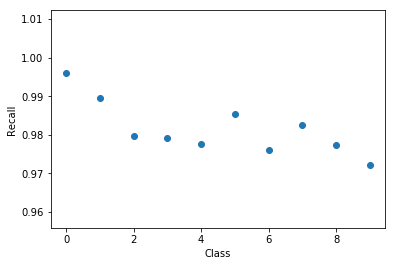

In [10]:
r = recall_score(y_test, preds, average=None)
print r

plt.scatter(range(0,10), r)
plt.xlabel("Class")
plt.ylabel("Recall")
plt.show()

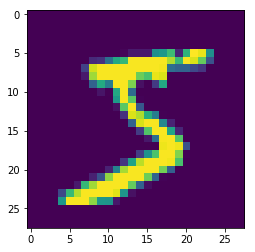

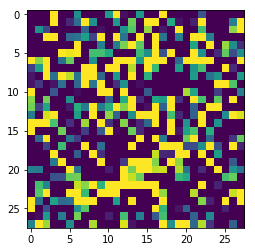

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
 9998/10000 [============================>.] - ETA: 0s('Test accuracy:', 0.85329999999999995)


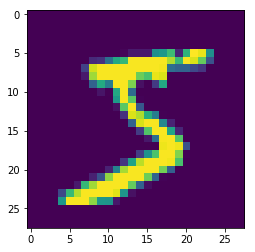

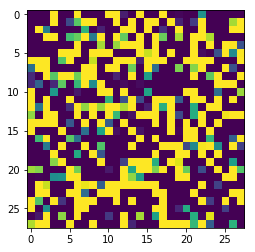

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
 9995/10000 [============================>.] - ETA: 0s('Test accuracy:', 0.79020000000000001)


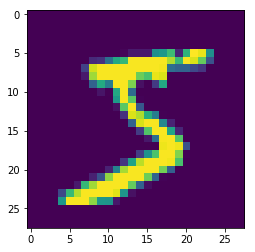

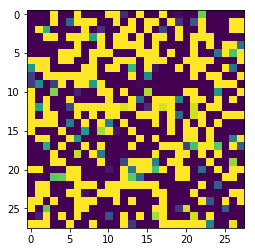

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
 9992/10000 [============================>.] - ETA: 0s('Test accuracy:', 0.64139999999999997)


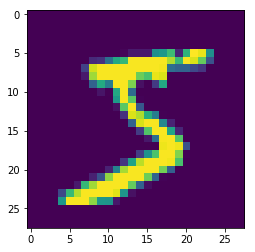

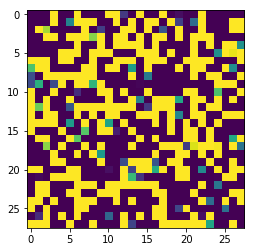

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
 9994/10000 [============================>.] - ETA: 0s('Test accuracy:', 0.61929999999999996)


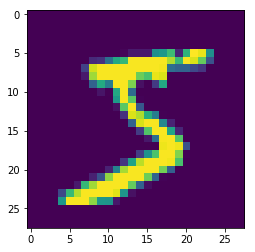

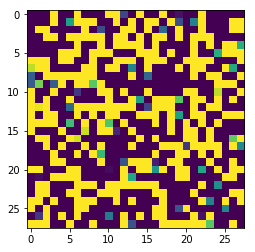

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
 9993/10000 [============================>.] - ETA: 0s('Test accuracy:', 0.52910000000000001)


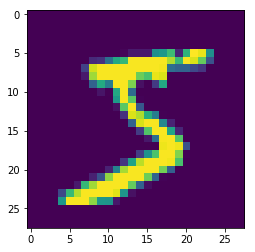

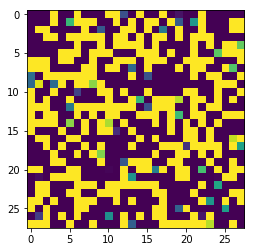

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
10000/10000 [==============================] - 19s    
('Test accuracy:', 0.4526)


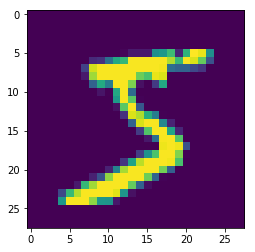

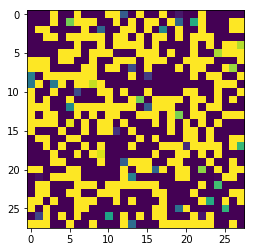

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
 9997/10000 [============================>.] - ETA: 0s('Test accuracy:', 0.37290000000000001)


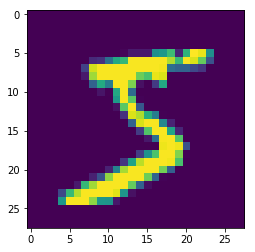

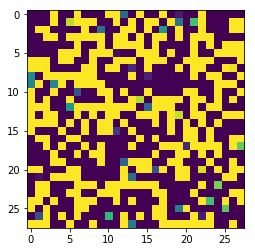

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
 9999/10000 [============================>.] - ETA: 0s('Test accuracy:', 0.33110000000000001)


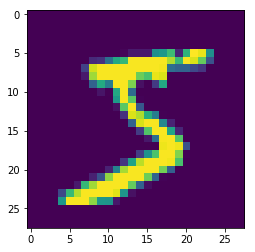

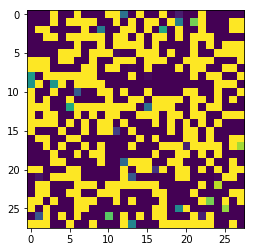

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
 9995/10000 [============================>.] - ETA: 0s('Test accuracy:', 0.3049)


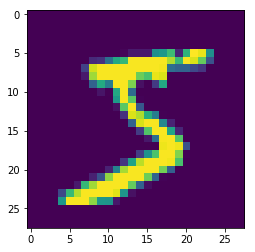

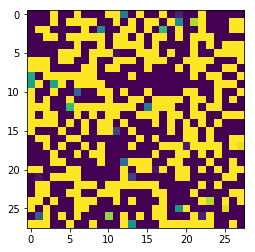

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
 9995/10000 [============================>.] - ETA: 0s('Test accuracy:', 0.32819999999999999)


In [3]:
#Data noise experiments

variance = [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
combined_acc = []
recall = []
for i in variance:
    X_train, Y_train, X_val, Y_val, X_test, Y_test, y_test, input_shape = du.get_data(data_noise=True, data_var=i)
                                                                               
    model = train(X_train, Y_train, X_val, Y_val, input_shape)
    score = model.eval(X_test, Y_test, 1)
    print('Test accuracy:', score[1])
    combined_acc.append(score[1]*100)
    
    pred_prob = model.eval_by_class(X_test)
    preds = pred_prob.argmax(1)
    recall.append(recall_score(y_test, preds, average=None))



[85.329999999999998, 79.019999999999996, 64.140000000000001, 61.929999999999993, 52.910000000000004, 45.259999999999998, 37.289999999999999, 33.109999999999999, 30.490000000000002, 32.82]


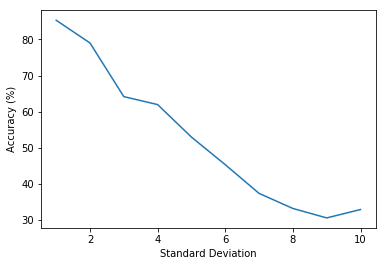

[[ 0.98571429  0.99735683  0.90503876  0.72871287  0.93686354  0.5426009
   0.90501044  0.91731518  0.71971253  0.84241824]
 [ 0.96836735  0.98061674  0.84593023  0.87623762  0.77393075  0.5
   0.88517745  0.87548638  0.63244353  0.5074331 ]
 [ 0.8744898   0.95859031  0.71317829  0.82772277  0.55804481  0.02578475
   0.81732777  0.73151751  0.51950719  0.28245788]
 [ 0.77959184  0.89515419  0.54554264  0.78514851  0.39511202  0.02802691
   0.74634656  0.74610895  0.67967146  0.49554014]
 [ 0.46428571  0.77973568  0.58430233  0.56534653  0.46639511  0.12668161
   0.56889353  0.65077821  0.5164271   0.48463826]
 [ 0.66530612  0.9215859   0.5125969   0.56237624  0.39511202  0.07623318
   0.0302714   0.51070039  0.36550308  0.3617443 ]
 [ 0.30408163  0.84493392  0.5251938   0.68910891  0.55804481  0.02466368
   0.03340292  0.07587549  0.40246407  0.160555  ]
 [ 0.56632653  0.96651982  0.28197674  0.71287129  0.11507128  0.03811659
   0.00208768  0.14007782  0.22073922  0.13875124]
 [ 0.223

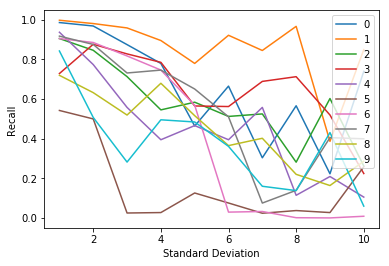

In [11]:
print combined_acc
x = range(1,11)
plt.plot(x, combined_acc)
plt.xlabel("Standard Deviation")
plt.ylabel("Accuracy (%)")
plt.show()

recall = np.asarray(recall)
print recall
for i in range(num_classes):
    plt.plot(x, recall[:,i], label=i)
plt.legend(loc='upper right')
plt.xlabel("Standard Deviation")
plt.ylabel("Recall")
plt.show()

In [ ]:

acc_with_lnoise = []
class_acc_with_lnoise = []
for i in range(3):
    X_train, Y_train, X_val, Y_val, X_test, Y_test, y_test, input_shape = du.get_data(data_noise=False, label_noise=True)
    
    model = train(X_train, Y_train, X_val, Y_val, input_shape)
    score = model.eval(X_test, Y_test, 1)
    acc_with_lnoise.append(score[1]*100)

    pred_prob = model.eval_by_class(X_test)
    preds = np.zeros_like(pred_prob)
    preds[np.arange(len(pred_prob)), pred_prob.argmax(1)] = 1
    class_acc_with_lnoise.append(np.mean((preds == Y_test), axis=0)*100)

print acc_with_lnoise